**importing necessary packages**

In [44]:
!pip install fredapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import * 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit
import math
from math import *
import seaborn as sns
import itertools
from fredapi import Fred
%matplotlib inline

**fred api key**

In [45]:
my_api_key = 'd409e53dac0d797ebe854764d77a6da8'

In [46]:
fred = Fred(api_key=my_api_key)

---------

**M2 and GDP over time**

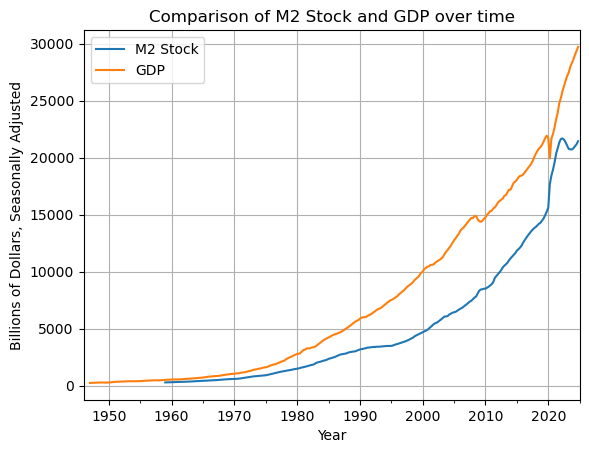

In [47]:
fred.get_series('M2SL', frequency='q').plot(label = 'M2 Stock')
fred.get_series('GDP', frequency='q').plot(label = 'GDP')
plt.grid(True)
plt.legend()
plt.ylabel('Billions of Dollars, Seasonally Adjusted')
plt.xlabel('Year')
plt.title('Comparison of M2 Stock and GDP over time');

**ratio of M2 and GDP over time**

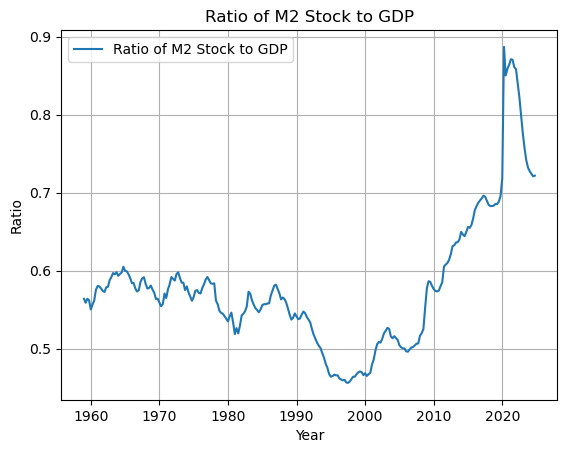

In [48]:
# Define the FRED series IDs for the two time series
money_supply = 'M2SL'
gdp = 'GDP'

# Fetch the time series data from FRED
ms_series = fred.get_series(money_supply, frequency='q')
gdp_series = fred.get_series(gdp, frequency='q')

# Ensure both time series have the same date range
start_date = max(ms_series.index.min(), gdp_series.index.min())
end_date = min(ms_series.index.max(), gdp_series.index.max())

ms_series = ms_series[start_date:end_date]
gdp_series = gdp_series[start_date:end_date]

# Calculate the ratio of the two time series
ratio = ms_series / gdp_series

# Create the plot
#plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(ratio, label='Ratio of M2 Stock to GDP')

# Customize the plot
plt.title('Ratio of M2 Stock to GDP')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()

**What do you infer from the above time series about the elasticity of money demand with respect to GDP?**
<br>

It appears that for many decades (1960-1990ish), the ratio of M2 to GDP was relatively consistent and stable around 0.5 to 0.6. Starting in 1990, it became much more volatile, dropping to around 0.45 before starting a 15-year climb to a ratio of about 0.7 in 2020. Following the COVID pandemic in early 2020, the ratio shot up to nearly 0.9, before dropping again to a ratio just above 0.7. The entire time series, however, the ratio of M2 to GDP never reaches 1.0 or higher, meaning GDP has constantly been growing faster than the money supply. To what extent this is true has varied by period. The sharp changes over time would suggest that overall, money demand is highly responsive to changes in GDP.

-----------

**federal funds rate over time**

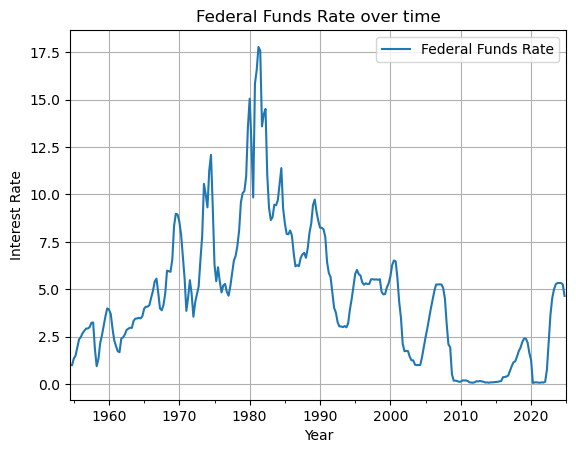

In [56]:
ffr = 'FEDFUNDS'
ffr_series = fred.get_series(ffr, frequency='q')
ffr_series.plot(label = 'Federal Funds Rate')
plt.legend()
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Federal Funds Rate over time');

--------

**comparing M2 growth rate and GDP growth rate**

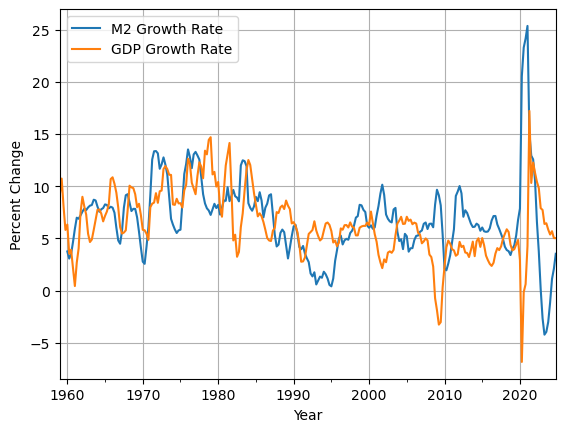

In [54]:
ms_series_growth_rate = fred.get_series(money_supply, frequency='q', units='pc1')[start_date:end_date]
gdp_series_growth_rate = fred.get_series(gdp, frequency='q', units='pc1')[start_date:end_date]

growth_rate_ratio = ms_series_growth_rate / gdp_series_growth_rate

#growth_rate_ratio.plot(label = 'Ratio')
ms_series_growth_rate.plot(label = 'M2 Growth Rate')
gdp_series_growth_rate.plot(label = 'GDP Growth Rate')

plt.legend()
plt.grid(True)
plt.ylabel('Percent Change')
plt.xlabel('Year');

------------

**Plotting the 'Ratio of M2 Growth Rate to GDP Growth Rate' and the 'Federal Funds Rate' since 1955** <br>
graph hard to read due to crazy data caused by COVID pandemic

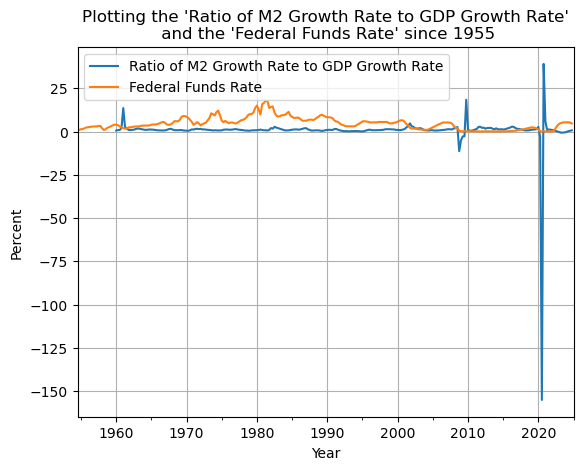

In [73]:
growth_rate_ratio.plot(label='Ratio of M2 Growth Rate to GDP Growth Rate')
ffr_series.plot(label='Federal Funds Rate')
plt.legend()
plt.grid(True)
plt.ylabel('Percent')
plt.xlabel('Year');
plt.title("Plotting the 'Ratio of M2 Growth Rate to GDP Growth Rate'\n and the 'Federal Funds Rate' since 1955");

**previous graph modified to exclude all data from COVID and beyond**

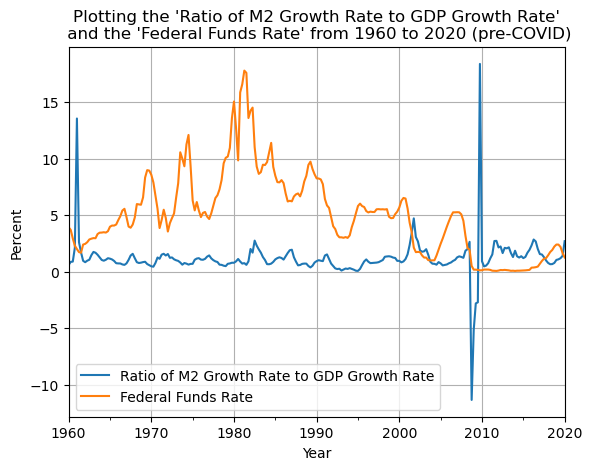

In [74]:
this_start_date = '1960-01-01'
this_end_date = '2020-01-01'

growth_rate_ratio[this_start_date:this_end_date].plot(label='Ratio of M2 Growth Rate to GDP Growth Rate')
ffr_series[this_start_date:this_end_date].plot(label='Federal Funds Rate')
plt.legend()
plt.grid(True)
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title("Plotting the 'Ratio of M2 Growth Rate to GDP Growth Rate'\n and the 'Federal Funds Rate' from 1960 to 2020 (pre-COVID)");

**What do the above time series tell you about 𝑏 in the equation for money demand? 
$$\mathrm{ln(\frac{M}{P})} = a - bi + \mathrm{ln(Y)}, b > 0$$**


The "Ratio of M2 Growth Rate to GDP Growth Rate" (blue line) appears to follow the trends set by the "Federal Funds Rate" (gold line), suggesting that that money demand is sensitive to interest rates, therefore implying a higher _b_.

--------

**graph showing only data from period post-COVID**

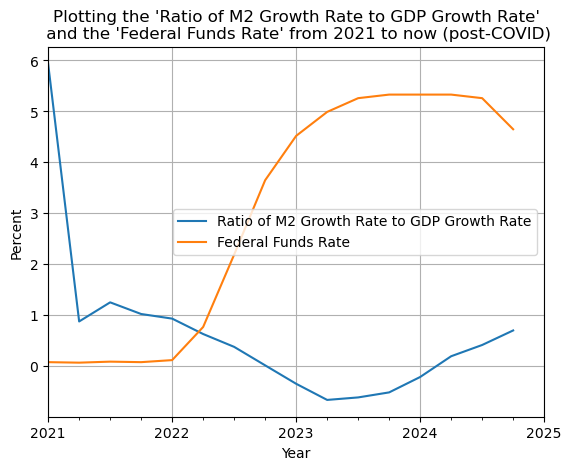

In [82]:
later_start_date = '2021-01-01'
later_end_date = '2025-01-01'

growth_rate_ratio[later_start_date:later_end_date].plot(label='Ratio of M2 Growth Rate to GDP Growth Rate')
ffr_series[later_start_date:later_end_date].plot(label='Federal Funds Rate')
plt.legend()
plt.grid(True)
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title("Plotting the 'Ratio of M2 Growth Rate to GDP Growth Rate'\n and the 'Federal Funds Rate' from 2021 to now (post-COVID)");